In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import pandas as pd 
import sklearn.feature_selection

import matplotlib.pyplot as plt
import numpy as np

from os import path
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

data_path = '/content/drive/My Drive/Colab Notebooks/averages_combined.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(13158, 63)
(12238, 63)
(12238,)
(12238, 58)


['offensive_rating_home', 'true_shooting_percentage_home', 'true_shooting_percentage_away', 'defensive_rating_home', 'offensive_rating_away', 'defensive_rating_away', 'effective_field_goal_percentage_away', 'effective_field_goal_percentage_home', 'total_rebound_percentage_home']


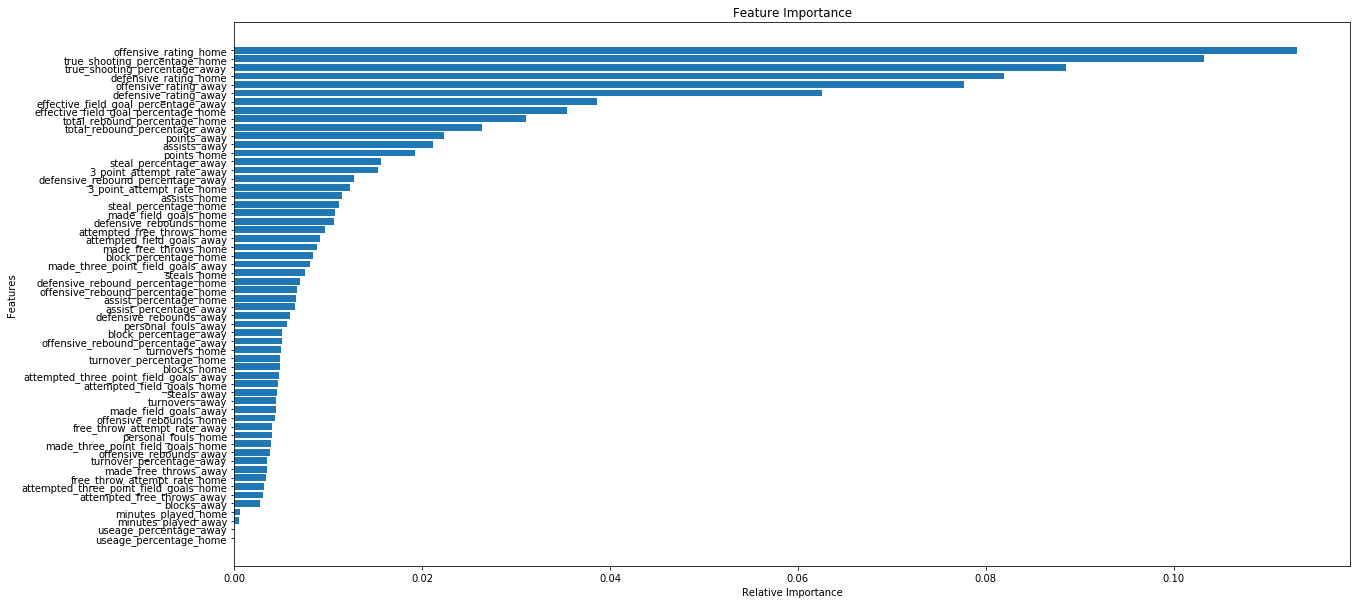

In [0]:
# Univariate feature selection
# Different methods SelectKBest, SelectPercentile
# using chi2 or f_classif results in slightly 
# different answers

# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

Optimal number of features : 8
[48 30 23 35 28 40 38 47 10 15 45 27 33 37  1  1 19 20 31 34  2 25  6 14
 16 51  1  1  3 50 32 22 18 12 46 44 43 26  5 36 41 21 42  1  1  8 39 29
 24  4  7 11 17 13 49  1  1  9]
Index(['true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       'offensive_rating_home', 'defensive_rating_home',
       'true_shooting_percentage_away', 'effective_field_goal_percentage_away',
       'offensive_rating_away', 'defensive_rating_away'],
      dtype='object')


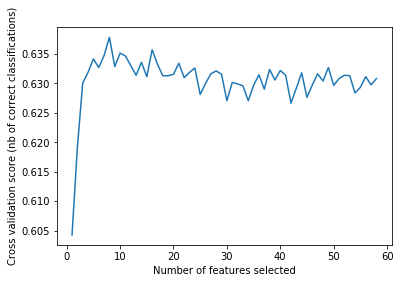

In [0]:
# Feature selection using scores
# Recursive feature elimination 
# SelectFromModel
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)



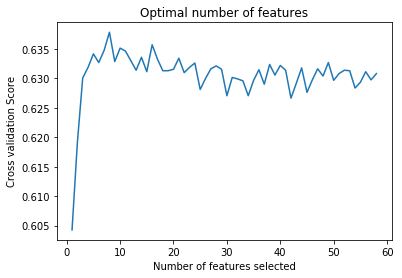

In [0]:
plt.figure()
plt.title('Optimal number of features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2007to2008.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1219, 63)
(1133, 63)
(1133,)
(1133, 58)


['offensive_rating_home', 'defensive_rating_away', 'true_shooting_percentage_away', 'effective_field_goal_percentage_away', 'offensive_rating_away', '3_point_attempt_rate_away', 'true_shooting_percentage_home', 'effective_field_goal_percentage_home', 'steal_percentage_away']


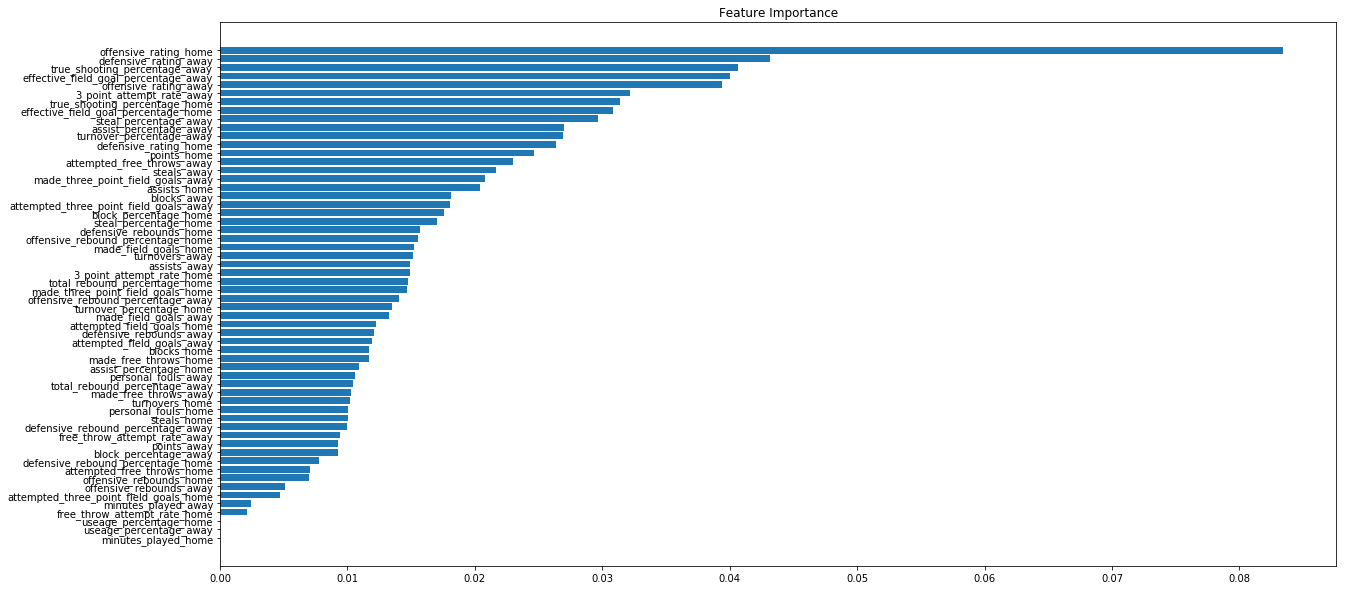

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

Optimal number of features : 7
[52 40 47 45 20 48 39 18 17 36 38 34 32 33  1  2 19 42 12 30 10  9 14 37
  8 50  1  4  6 49 25 43 11 24 27 41 44 29 16 26 46 21 23  1  1  1 35 28
 15 13 31  3  5  7 51  1  1 22]
Index(['true_shooting_percentage_home', 'offensive_rating_home',
       'true_shooting_percentage_away', 'effective_field_goal_percentage_away',
       '3_point_attempt_rate_away', 'offensive_rating_away',
       'defensive_rating_away'],
      dtype='object')


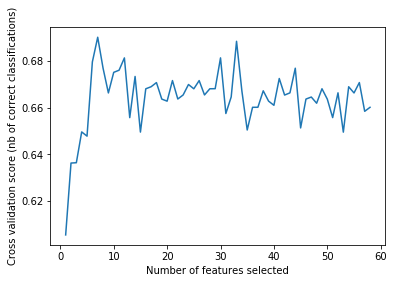

In [0]:
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2008to2009.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)



(1220, 63)
(1135, 63)
(1135,)
(1135, 58)


['true_shooting_percentage_home', 'defensive_rating_home', 'total_rebound_percentage_away', 'defensive_rating_away', 'offensive_rating_home', 'offensive_rating_away', 'total_rebound_percentage_home', 'made_three_point_field_goals_home', 'effective_field_goal_percentage_home']


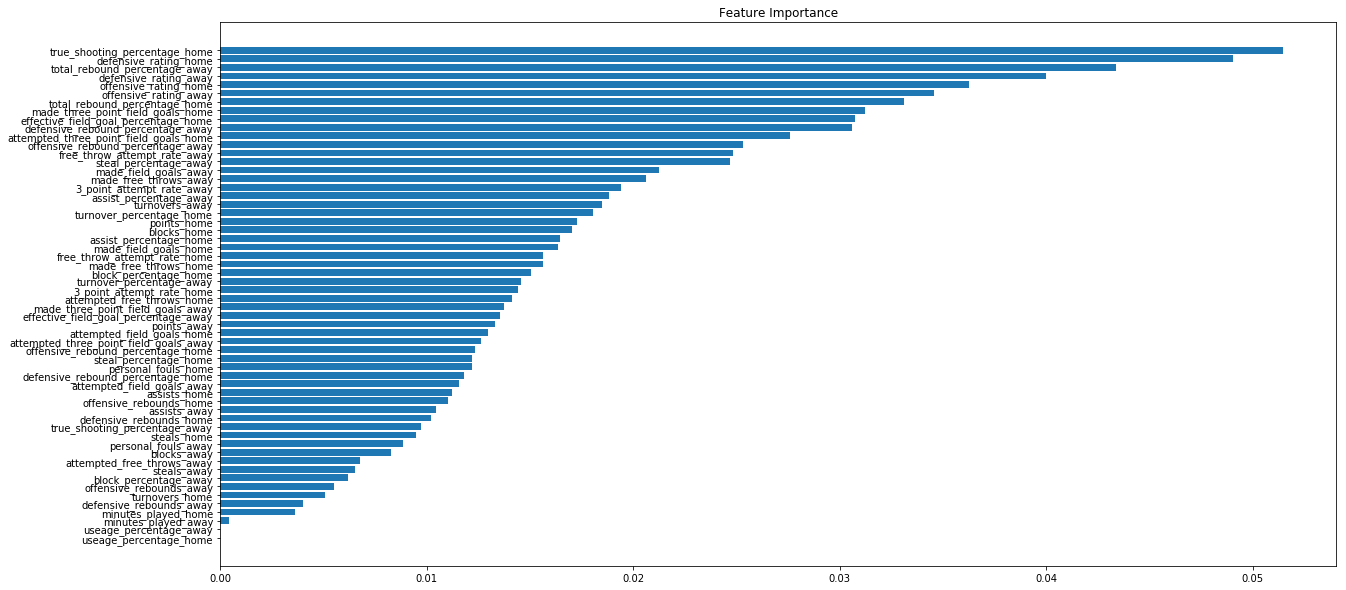

Optimal number of features : 8
[48 24 43  3  9 25 39 15 11 28 29 30 16 33  1  2  1 12  4 13  1 17 42  6
 22 51  1  1 21 49 37  7 40 32 14 27 18 45 26 36 47 23 19 31 35  8 41 38
  1  1 10 44 34  5 50 20  1 46]
Index(['true_shooting_percentage_home', '3_point_attempt_rate_home',
       'total_rebound_percentage_home', 'offensive_rating_home',
       'defensive_rating_home', 'defensive_rebound_percentage_away',
       'total_rebound_percentage_away', 'defensive_rating_away'],
      dtype='object')


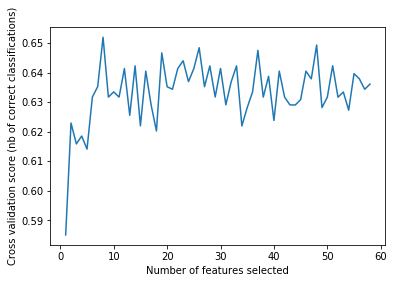

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2009to2010.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1217, 63)
(1135, 63)
(1135,)
(1135, 58)


['free_throw_attempt_rate_home', 'defensive_rating_home', 'offensive_rating_away', 'made_free_throws_home', 'offensive_rating_home', 'true_shooting_percentage_home', '3_point_attempt_rate_home', 'true_shooting_percentage_away', 'total_rebound_percentage_home']


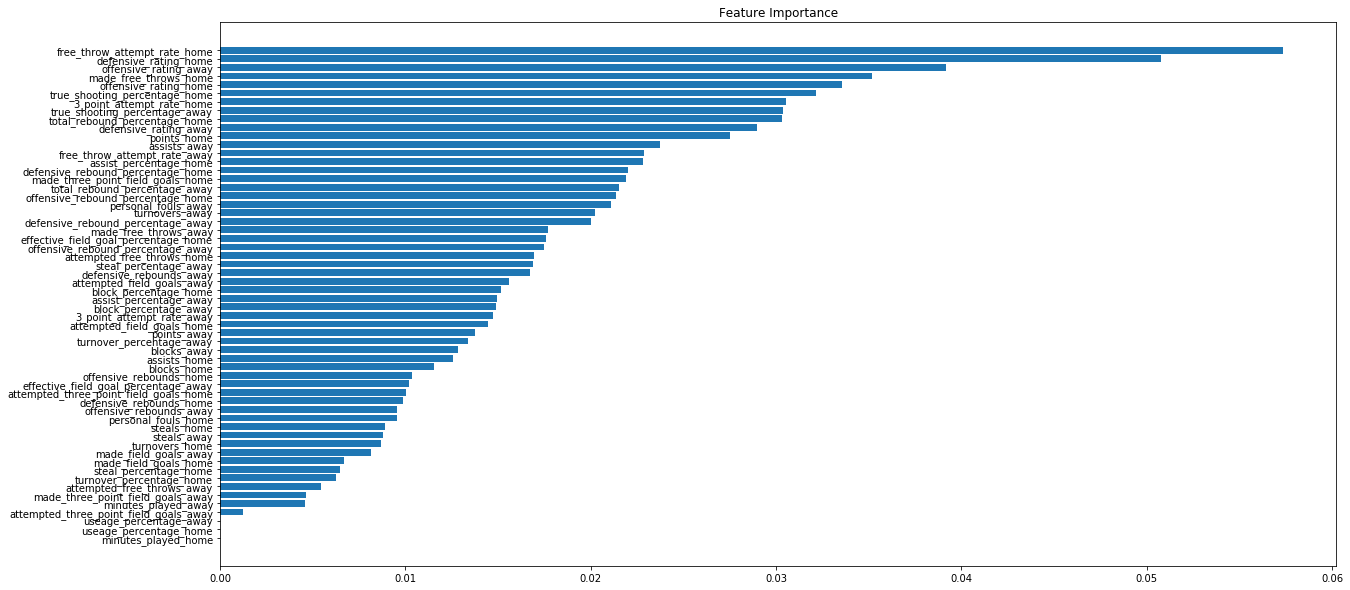

Optimal number of features : 33
[26 15 20  1 19  1  1 22  1  1 18  8 13  3  1  1  1  1  9  1  1  1  6  1
  7 24  1  1  4 23 21  1  1 14 12  1 17 11  1 16  1  1  1  1  1  5  1  1
  1  1  1 10  1  1 25  1  1  2]
Index(['made_three_point_field_goals_home', 'made_free_throws_home',
       'attempted_free_throws_home', 'defensive_rebounds_home', 'assists_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'free_throw_attempt_rate_home',
       'defensive_rebound_percentage_home', 'total_rebound_percentage_home',
       'assist_percentage_home', 'block_percentage_home',
       'offensive_rating_home', 'defensive_rating_home',
       'attempted_field_goals_away', 'made_three_point_field_goals_away',
       'attempted_free_throws_away', 'assists_away', 'blocks_away',
       'turnovers_away', 'personal_fouls_away',
       'true_shooting_percentage_away', 'effective_field_goal_percentage_away',
       'free_throw_attempt_rate

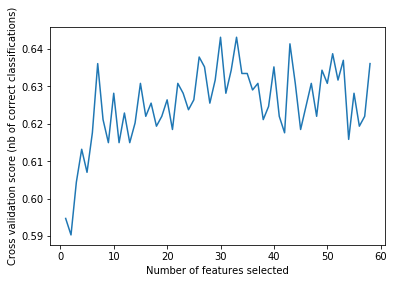

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

(1217, 63)
(1135, 63)
(1135,)
(1135, 58)


In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2010to2011.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1213, 63)
(1132, 63)
(1132,)
(1132, 58)


['defensive_rating_away', 'offensive_rating_away', 'true_shooting_percentage_away', 'total_rebound_percentage_away', 'defensive_rating_home', 'offensive_rating_home', 'points_home', 'defensive_rebounds_away', 'turnovers_home']


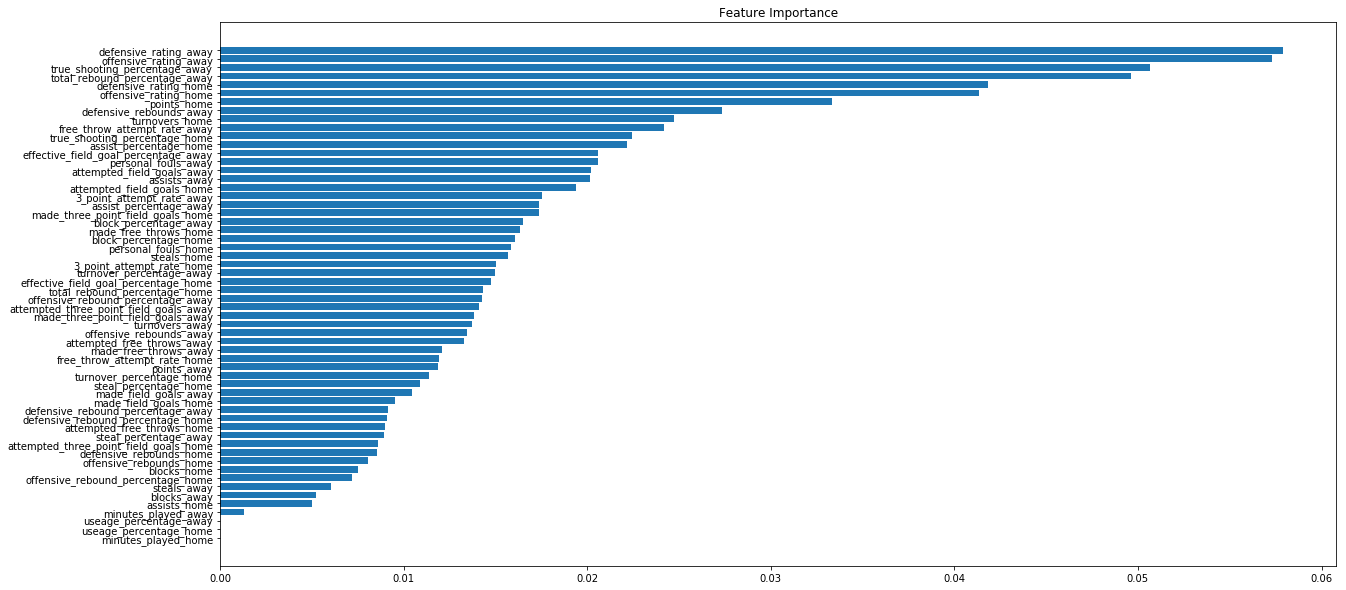

Optimal number of features : 33
[26  1  1 15 20 17  1 12 14 11  8 13  1  1  1  1  1 21  6  1  1  1  1  1
  1 24  1  1 16 23 18  1  1  1  1  5  1  1  4 22 19 10  1  1  1  1  1  9
  3  1  2  1  7  1 25  1  1  1]
Index(['made_field_goals_home', 'attempted_field_goals_home',
       'attempted_free_throws_home', 'turnovers_home', 'personal_fouls_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'defensive_rebound_percentage_home',
       'total_rebound_percentage_home', 'assist_percentage_home',
       'steal_percentage_home', 'block_percentage_home',
       'turnover_percentage_home', 'offensive_rating_home',
       'defensive_rating_home', 'attempted_field_goals_away',
       'made_three_point_field_goals_away',
       'attempted_three_point_field_goals_away', 'made_free_throws_away',
       'offensive_rebounds_away', 'defensive_rebounds_away',
       'personal_fouls_away', 'true_shooting_percentage_away',
       'ef

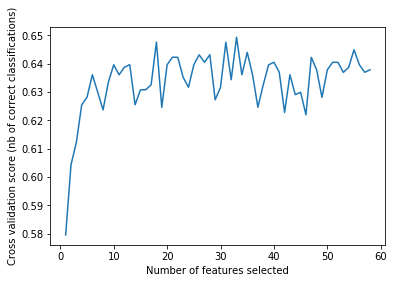

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2011to2012.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(979, 63)
(895, 63)
(895,)
(895, 58)


['total_rebound_percentage_home', 'made_field_goals_home', 'offensive_rating_home', 'steal_percentage_home', 'defensive_rating_home', 'steals_home', 'effective_field_goal_percentage_home', 'defensive_rebound_percentage_home', 'attempted_field_goals_home']


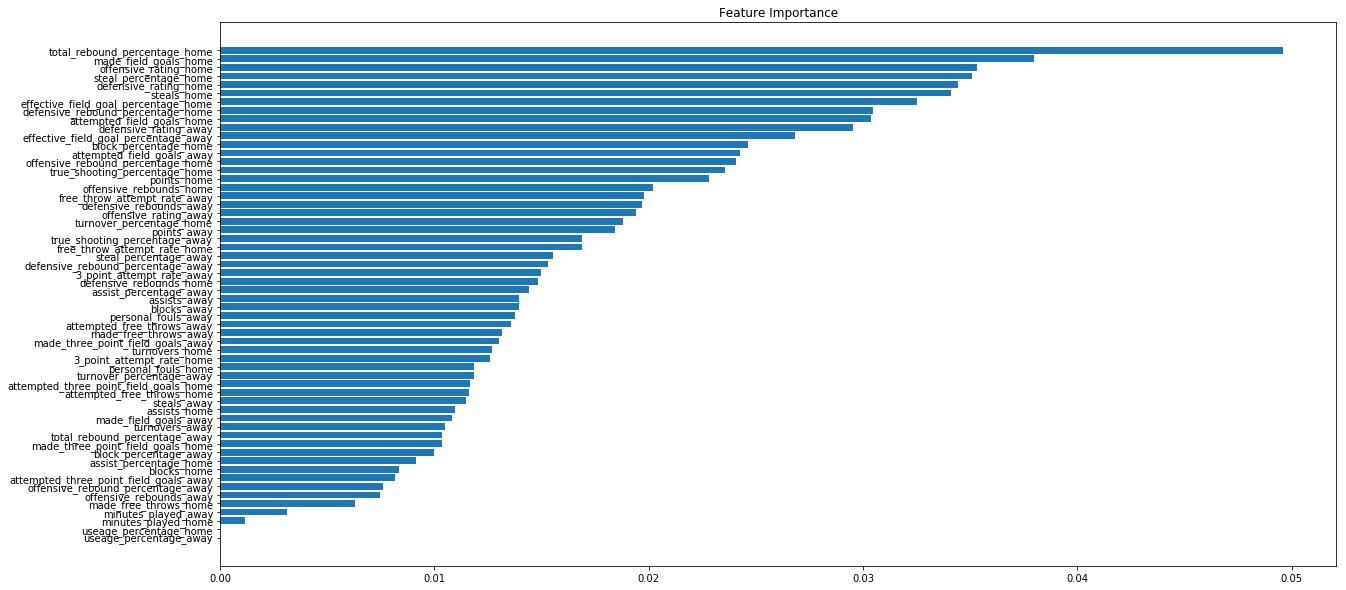

Optimal number of features : 44
[14  1  1  1  1  1  1  1  1  1  1  6  3  2  1  1  1  1  1  1  1  8  1  1
  1 13  1  1  1 12  1  1  1  5  1  1  1  1 11  7 10  1  1  1  1  1  1  1
  4  1  1  1  1  9 15  1  1  1]
Index(['made_field_goals_home', 'attempted_field_goals_home',
       'made_three_point_field_goals_home',
       'attempted_three_point_field_goals_home', 'made_free_throws_home',
       'attempted_free_throws_home', 'offensive_rebounds_home',
       'defensive_rebounds_home', 'assists_home', 'steals_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'free_throw_attempt_rate_home',
       'offensive_rebound_percentage_home',
       'defensive_rebound_percentage_home', 'total_rebound_percentage_home',
       'steal_percentage_home', 'block_percentage_home',
       'turnover_percentage_home', 'offensive_rating_home',
       'defensive_rating_home', 'points_home', 'made_field_goals_away',
       'attempted_field

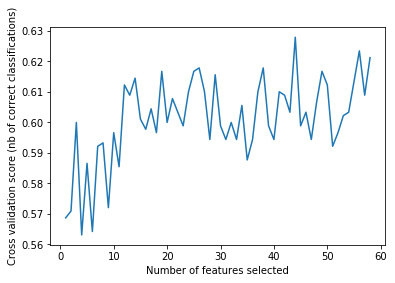

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2012to2013.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1218, 63)
(1133, 63)
(1133,)
(1133, 58)


['steal_percentage_home', 'true_shooting_percentage_away', 'effective_field_goal_percentage_away', 'true_shooting_percentage_home', 'offensive_rebound_percentage_away', 'steal_percentage_away', 'total_rebound_percentage_away', 'defensive_rating_home', 'defensive_rating_away']


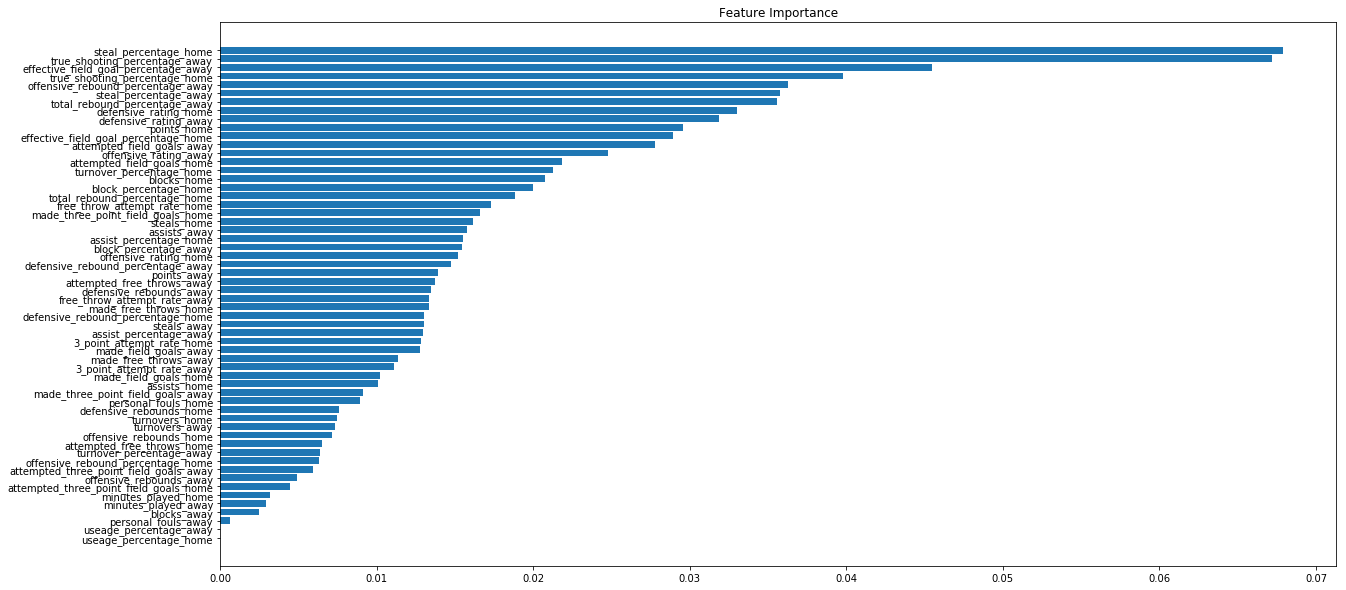

Optimal number of features : 47
[ 9  1  1  4  1  1  1  1  5  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 12  1  1  1 10  1  1  1  1  1  3  1  1  8  1  7  1  6  1  1  1  1  1
  1  1  1  1  1  1 11  1  1  1]
Index(['made_field_goals_home', 'attempted_field_goals_home',
       'attempted_three_point_field_goals_home', 'made_free_throws_home',
       'attempted_free_throws_home', 'offensive_rebounds_home', 'steals_home',
       'blocks_home', 'turnovers_home', 'personal_fouls_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'free_throw_attempt_rate_home',
       'offensive_rebound_percentage_home',
       'defensive_rebound_percentage_home', 'total_rebound_percentage_home',
       'assist_percentage_home', 'steal_percentage_home',
       'block_percentage_home', 'turnover_percentage_home',
       'offensive_rating_home', 'defensive_rating_home', 'points_home',
       'made_field_goals_away', 'attempted_field_goal

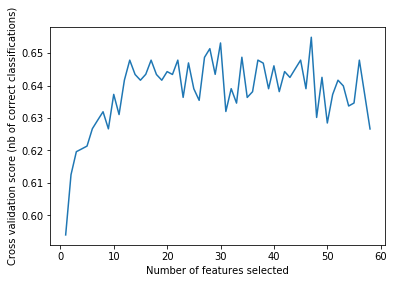

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2013to2014.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1224, 63)
(1135, 63)
(1135,)
(1135, 58)


['true_shooting_percentage_home', 'defensive_rating_home', 'offensive_rating_away', 'effective_field_goal_percentage_away', 'true_shooting_percentage_away', '3_point_attempt_rate_away', 'effective_field_goal_percentage_home', 'free_throw_attempt_rate_home', 'total_rebound_percentage_away']


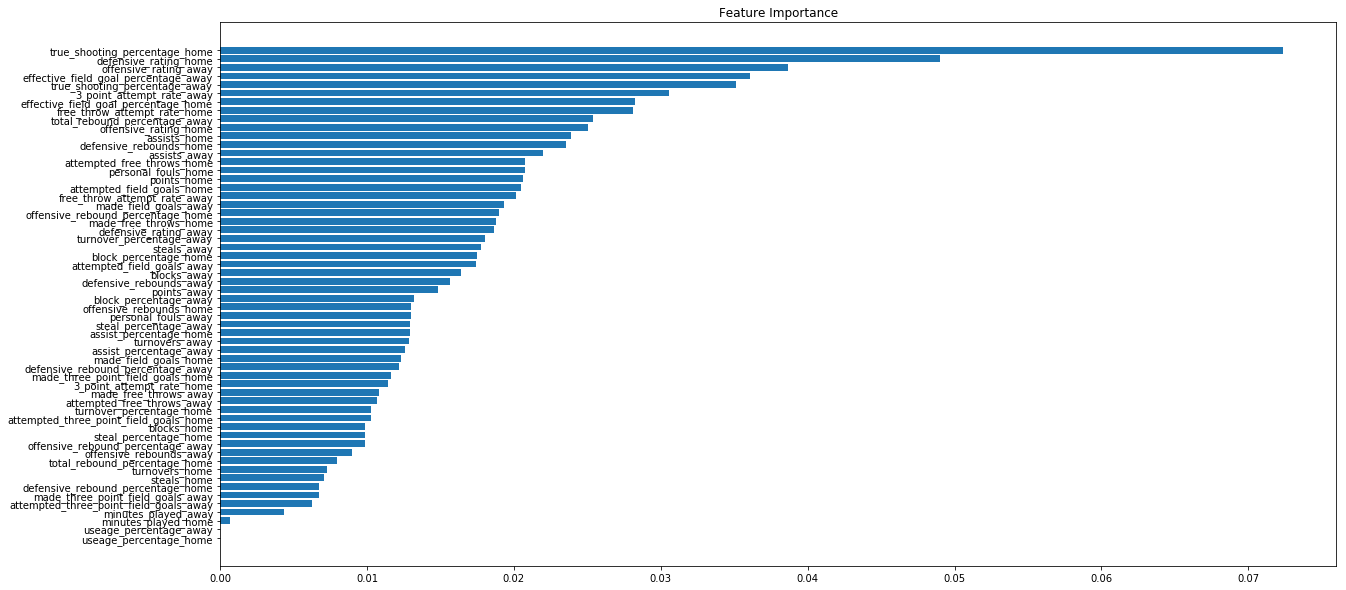

Optimal number of features : 42
[14  9  1  1  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 11 17  1  1  1 16  4  1  3  2  1  1  7 10  1  1 13  1  6  1  1  1  1  8
  1  1  1 12  1  1 15  1  1  1]
Index(['attempted_field_goals_home', 'made_three_point_field_goals_home',
       'attempted_three_point_field_goals_home', 'made_free_throws_home',
       'attempted_free_throws_home', 'offensive_rebounds_home',
       'defensive_rebounds_home', 'steals_home', 'blocks_home',
       'turnovers_home', 'personal_fouls_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'free_throw_attempt_rate_home',
       'offensive_rebound_percentage_home',
       'defensive_rebound_percentage_home', 'total_rebound_percentage_home',
       'assist_percentage_home', 'steal_percentage_home',
       'block_percentage_home', 'offensive_rating_home',
       'defensive_rating_home', 'points_home', 'attempted_field_goals_away',
     

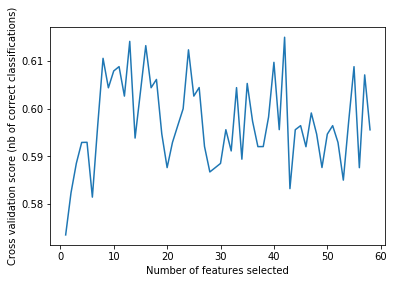

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2014to2015.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1216, 63)
(1135, 63)
(1135,)
(1135, 58)


['offensive_rating_home', 'true_shooting_percentage_home', 'defensive_rating_home', 'made_three_point_field_goals_home', 'effective_field_goal_percentage_away', 'effective_field_goal_percentage_home', 'true_shooting_percentage_away', 'points_away', 'offensive_rating_away']


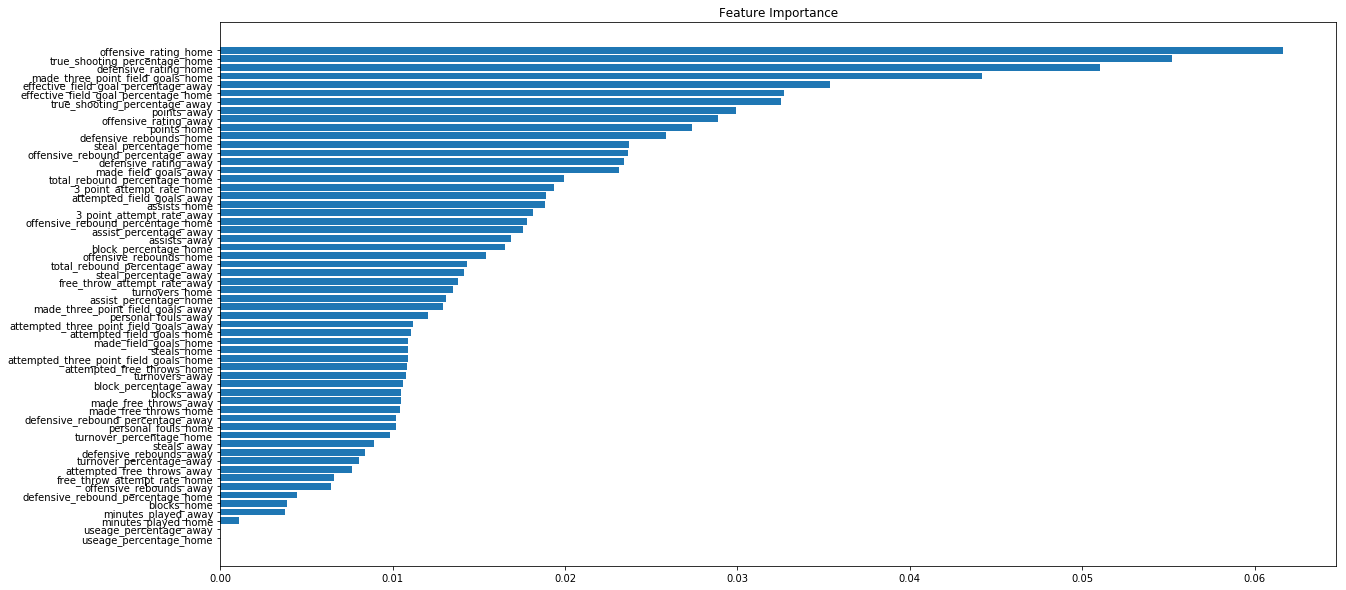

Optimal number of features : 17
[40  5 17  1  1 26  9 28  1  3 38 18 34 19  1  1  1 21 15  1  1 14 16 27
  7 42  1  1  1 39  2 33 11  4 36 24 30 35 12 20 22 31 23  1  1  1 29 32
 13 37  6 10  1 25 41  1  1  8]
Index(['made_three_point_field_goals_home',
       'attempted_three_point_field_goals_home', 'defensive_rebounds_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'defensive_rebound_percentage_home',
       'total_rebound_percentage_home', 'offensive_rating_home',
       'defensive_rating_home', 'points_home', 'true_shooting_percentage_away',
       'effective_field_goal_percentage_away', '3_point_attempt_rate_away',
       'block_percentage_away', 'offensive_rating_away',
       'defensive_rating_away'],
      dtype='object')


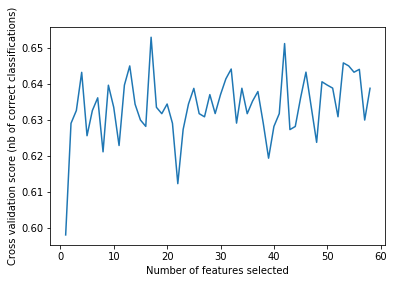

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2015to2016.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1221, 63)
(1135, 63)
(1135,)
(1135, 58)


['offensive_rating_home', 'true_shooting_percentage_home', 'defensive_rating_away', 'effective_field_goal_percentage_away', 'defensive_rating_home', 'total_rebound_percentage_away', 'turnover_percentage_home', 'true_shooting_percentage_away', 'assists_away']


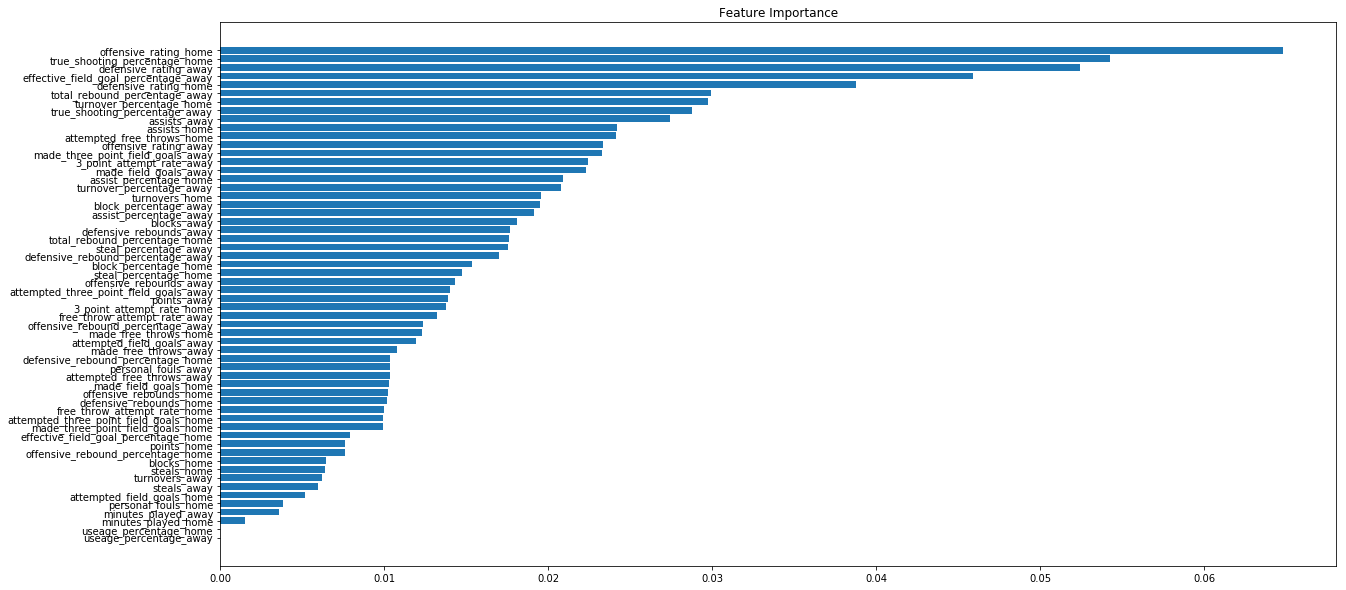

Optimal number of features : 47
[10  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  8  1  1  1  1  1
  1 11  1  1  1  9  4  1  1  1  6  3  1  1  1  1  7  5  1  1  1  1  1  1
  1  1  1  1  1  1 12  1  1  1]
Index(['made_field_goals_home', 'attempted_field_goals_home',
       'made_three_point_field_goals_home',
       'attempted_three_point_field_goals_home', 'made_free_throws_home',
       'attempted_free_throws_home', 'defensive_rebounds_home', 'assists_home',
       'steals_home', 'blocks_home', 'turnovers_home', 'personal_fouls_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'free_throw_attempt_rate_home',
       'defensive_rebound_percentage_home', 'total_rebound_percentage_home',
       'assist_percentage_home', 'steal_percentage_home',
       'block_percentage_home', 'turnover_percentage_home',
       'offensive_rating_home', 'defensive_rating_home', 'points_home',
       'attempted_field_goals_away', 

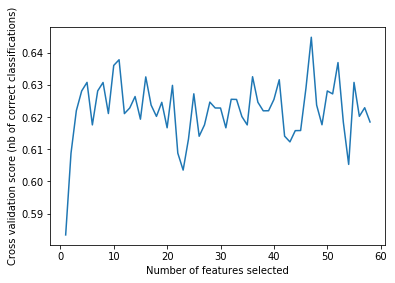

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2016to2017.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1214, 63)
(1135, 63)
(1135,)
(1135, 58)


['offensive_rating_home', 'effective_field_goal_percentage_away', 'turnover_percentage_home', 'personal_fouls_home', 'defensive_rebound_percentage_away', 'true_shooting_percentage_away', 'points_away', 'made_three_point_field_goals_away', 'effective_field_goal_percentage_home']


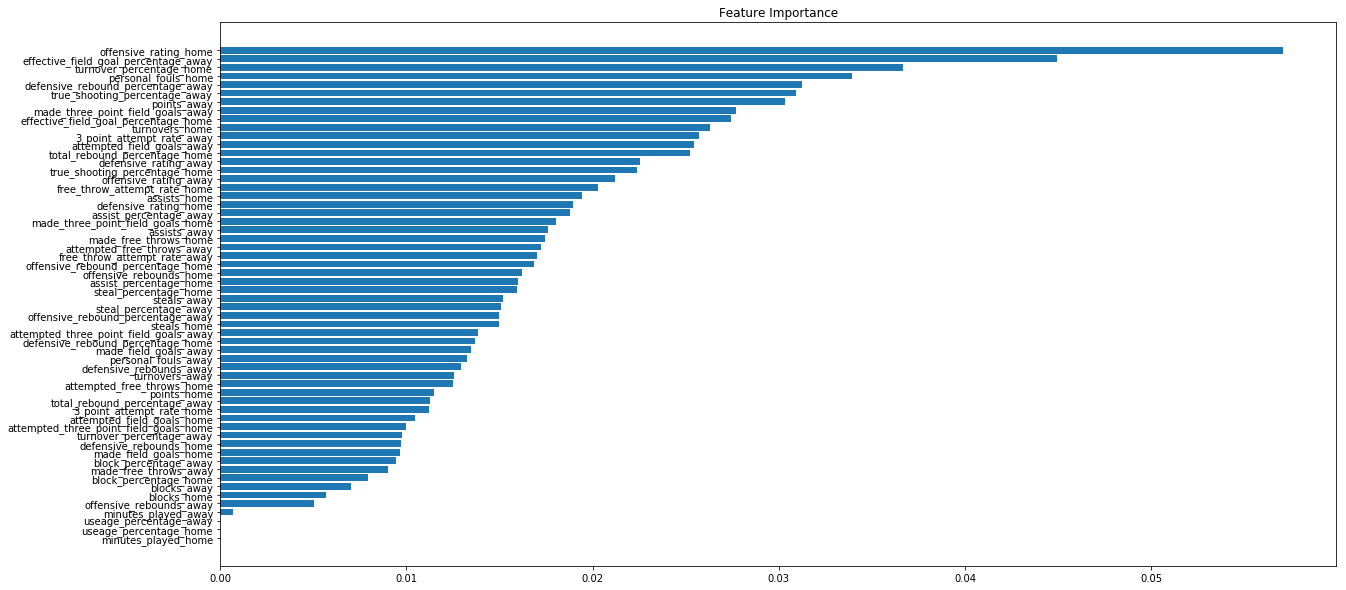

Optimal number of features : 47
[12  1  1  1  1  1  8  7  1  1  6  1  1  1  1  1  1  1  4  2  1  1  1  1
  1 10  1  1  3  9  1  1  1  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 11  1  1  1]
Index(['made_field_goals_home', 'attempted_field_goals_home',
       'made_three_point_field_goals_home',
       'attempted_three_point_field_goals_home', 'made_free_throws_home',
       'defensive_rebounds_home', 'assists_home', 'blocks_home',
       'turnovers_home', 'personal_fouls_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       '3_point_attempt_rate_home', 'free_throw_attempt_rate_home',
       'total_rebound_percentage_home', 'assist_percentage_home',
       'steal_percentage_home', 'block_percentage_home',
       'turnover_percentage_home', 'offensive_rating_home',
       'defensive_rating_home', 'made_field_goals_away',
       'attempted_field_goals_away', 'made_three_point_field_goals_away',
       'attempted_three_point_field

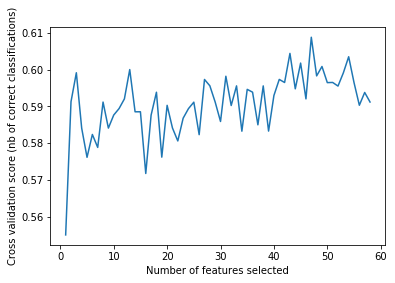

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/averages/averages2017to2018.csv'
df = pd.read_csv(data_path)
print(df.shape)
df = df.loc[df['during_playoffs'] == 0]
print(df.shape)

# Include home won/loss data
y = df['home_won']
print(y.shape)
# Include all other training data apart from specific ones
X = df.drop(['season', 'date', 'home_team', 'home_won', 'during_playoffs'], axis=1)
print(X.shape)

(1217, 63)
(1135, 63)
(1135,)
(1135, 58)


['offensive_rating_home', 'defensive_rating_away', 'steal_percentage_home', 'defensive_rating_home', 'effective_field_goal_percentage_away', 'assists_away', 'made_field_goals_away', 'true_shooting_percentage_away', 'made_free_throws_home']


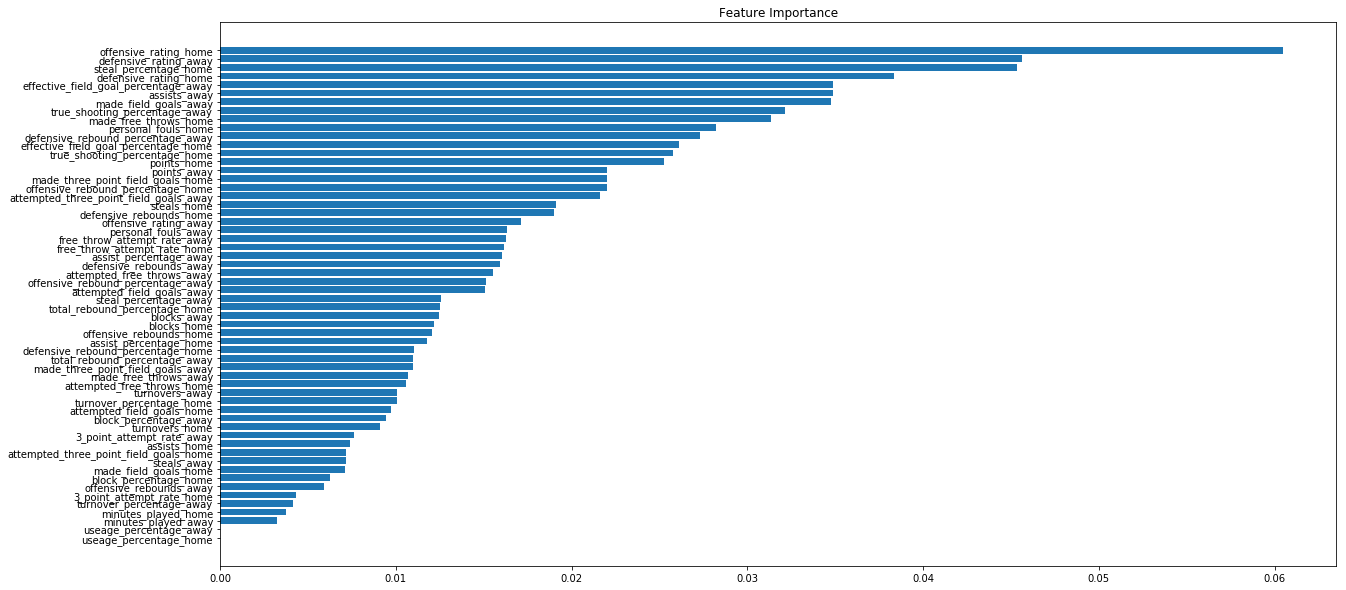

Optimal number of features : 20
[37 32 27  1 25 18 31 33 30 17 26 29  9  1  1  1 10  5  4  1  1 19  1  1
 22 39  1  1  1 34  7 28 12  1 21 15 23  3  1 24  8 35 36  1  1  2 11  6
 13 14  1 20  1 16 38  1  1  1]
Index(['made_three_point_field_goals_home', 'personal_fouls_home',
       'true_shooting_percentage_home', 'effective_field_goal_percentage_home',
       'defensive_rebound_percentage_home', 'total_rebound_percentage_home',
       'steal_percentage_home', 'block_percentage_home',
       'offensive_rating_home', 'defensive_rating_home', 'points_home',
       'attempted_three_point_field_goals_away', 'assists_away',
       'true_shooting_percentage_away', 'effective_field_goal_percentage_away',
       'assist_percentage_away', 'block_percentage_away',
       'offensive_rating_away', 'defensive_rating_away', 'points_away'],
      dtype='object')


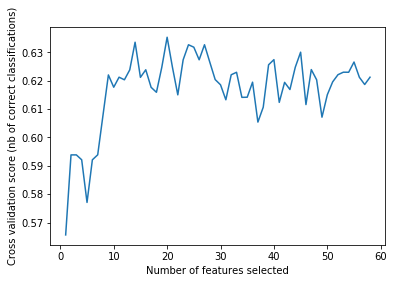

In [0]:
# Should set max_depth and min_samples_leaf
clf = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1, max_depth=5)
# Train model

# Importance are "gini importance" or "mean decrease impurity" and is the "total decrease in node impurity weighted
# by the probability of reaching the node"

model = clf.fit(X, y)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for  i in indices]
print(names[:9])
plt.figure(figsize=(20,10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.gca().invert_yaxis()
plt.yticks(range(X.shape[1]), names, rotation=0)
plt.show()

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
selector = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
column_names_3 = X.columns[selector.get_support()]
print(rfecv.ranking_)
print(column_names_3)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()